In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler as mms 
from sklearn.gaussian_process import GaussianProcessRegressor as gpr
from sklearn.model_selection import train_test_split
from GA_functions import fitness, select_parents, crossover, mutation, GA_algorithm, GA_algorithm_unnormalized, conc_to_spectra, perform_iteration, set_seed #normalize_and_pca
from tree_search_functions import zeroth_iteration, nth_iteration, plot_fitness, plot_spectra, plot_DLS

## Initialize and Load Data

In [2]:
#This block of code creates random concentrations and spectra to start the algorithm. 
Sample_concentrations = pd.read_excel('Sample_concentrations.xlsx')
red_conc = Sample_concentrations[['Red vol frac']].values
green_conc = Sample_concentrations[['Green vol frac']].values
blue_conc = Sample_concentrations[['Blue vol frac']].values
sample_conc = np.hstack((red_conc, green_conc, blue_conc))

sample_spectra = pd.read_excel('Sample_spectra.xlsx')
sample_spectra = np.asarray(sample_spectra)
red = sample_spectra[:,1]
green = sample_spectra[:,2]
blue = sample_spectra[:,3]
wavelength = sample_spectra[:,0]


################ INPUTS #####################################################################
np.random.seed(2)
conc_array = np.random.dirichlet((1, 1,1), 7)
spectra_array = conc_to_spectra(conc_array, sample_spectra[:,1:conc_array.shape[1]+1])
#############################################################################################

#conc_array_actual = conc_array
#spectra_array_actual = spectra_array

#Change Desired Spectra 
objective_row = -1
##################### INPUT ################################################################
x_test = sample_spectra[:,objective_row].reshape(-1,1) 
############################################################################################
target_conc = sample_conc[objective_row,:]
print(target_conc)



[0.5073313  0.01445543 0.47821328]


In [3]:
def perform_UV_vis(next_gen_conc, conc_array_actual, spectra_array_actual):
    current_gen_spectra = conc_to_spectra(next_gen_conc, sample_spectra[:,1:sample_conc.shape[1]+1])
    conc_array_actual = np.vstack((conc_array_actual, next_gen_conc))
    spectra_array_actual = np.vstack((spectra_array_actual, current_gen_spectra))
    return current_gen_spectra, conc_array_actual, spectra_array_actual

def perform_DLS(next_gen_conc, DLS_array_actual, conc_array_actual):
    distance_list = []
    for i in range(next_gen_conc.shape[0]):
        distance = 5*next_gen_conc[i,0] - 4*next_gen_conc[i,1] + 2*next_gen_conc[i,2]
        distance_list.append(distance)
    current_gen_DLS = np.asarray(distance_list).reshape(-1,1)
    DLS_array_actual = np.vstack((DLS_array_actual, current_gen_DLS))
    conc_array_actual = np.vstack((conc_array_actual, next_gen_conc))
    return current_gen_DLS, conc_array_actual, DLS_array_actual 

def perform_DLS_zero(next_gen_conc):
    target_conc = np.array([0.500, 0.014, 0.486])
    distance_list = []
    for i in range(next_gen_conc.shape[0]):
        distance = np.sum(np.abs(next_gen_conc[i] - target_conc)) + 5
        distance_list.append(distance)
    current_gen_DLS = np.asarray(distance_list).reshape(-1,1)
    return current_gen_DLS
    
def export_to_csv(conc_array):
    sample_volume = 300 #uL 
    conc_array = conc_array*sample_volume
    df = pd.DataFrame(conc_array, columns =['red-stock', 'green-stock', 'blue-stock'])
    df.to_csv("concentration_array.csv", index = False)

def import_from_excel(filename, conc_array_actual, spectra_array_actual):
    sample_spectra = pd.read_excel(filename)
    current_gen_spectra = np.asarray(sample_spectra)
    conc_array_actual = np.vstack((conc_array_actual, next_gen_conc))
    spectra_array_actual = np.vstack((spectra_array_actual, current_gen_spectra))
    return current_gen_spectra, conc_array_actual, spectra_array_actual 



In [4]:
single_data = perform_DLS_zero(conc_array)
single_desired = 0

In [5]:
conc_array

array([[0.41002688, 0.01880712, 0.571166  ],
       [0.37652229, 0.35930123, 0.26417647],
       [0.14764527, 0.62268162, 0.22967311],
       [0.15258201, 0.47714012, 0.37027786],
       [0.13519817, 0.67409914, 0.19070269],
       [0.37127166, 0.46424227, 0.16448607],
       [0.70437887, 0.03118819, 0.26443294]])

## Analyze Fitness of Zeroth Iteration

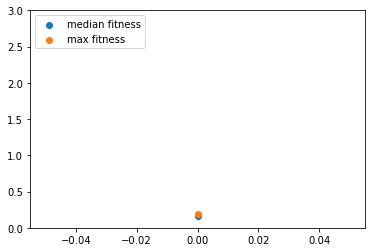

The max fitness is: 0.19268022322998737
The median fitness is: 0.1691908663410498


In [6]:
###################### Setting 3 #########################
#loaded_dict = zeroth_iteration(conc_array = conc_array, spectra_array = spectra_array, desired_spectra = x_test, single_data = single_data, single_desired = single_desired)
####################### Setting 1 #######################
#spectra_array = spectra_array.T
#spectra_array = mms().fit(spectra_array).transform(spectra_array).T
#x_test = mms().fit(x_test).transform(x_test).T
#x_test = x_test.reshape(1, -1)[0].reshape(-1, 1).T
#loaded_dict = zeroth_iteration(conc_array = conc_array, spectra_array = spectra_array, desired_spectra = x_test)
###################### Setting 2 ############################
loaded_dict = zeroth_iteration(conc_array = conc_array, single_data = single_data, single_desired = single_desired)

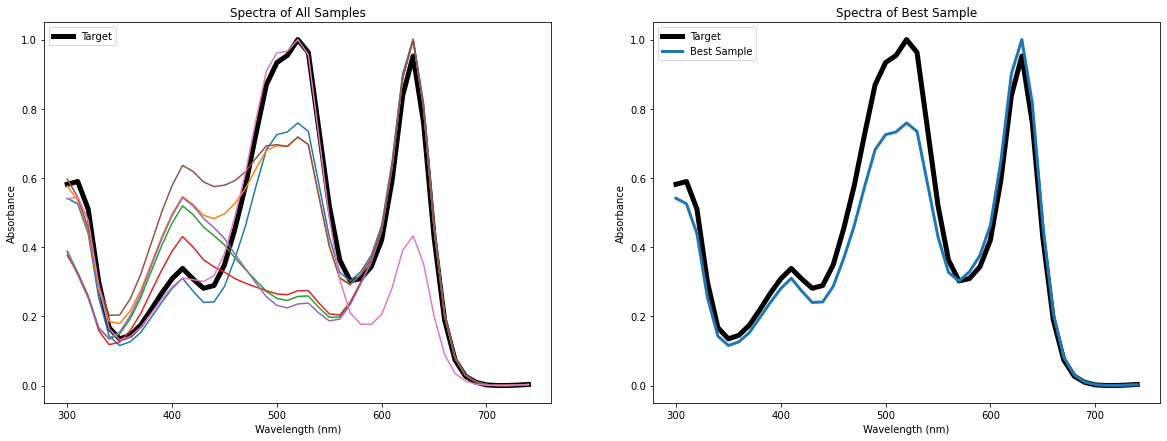

In [5]:
plot_spectra(loaded_dict, wavelength = wavelength, savefig = False)

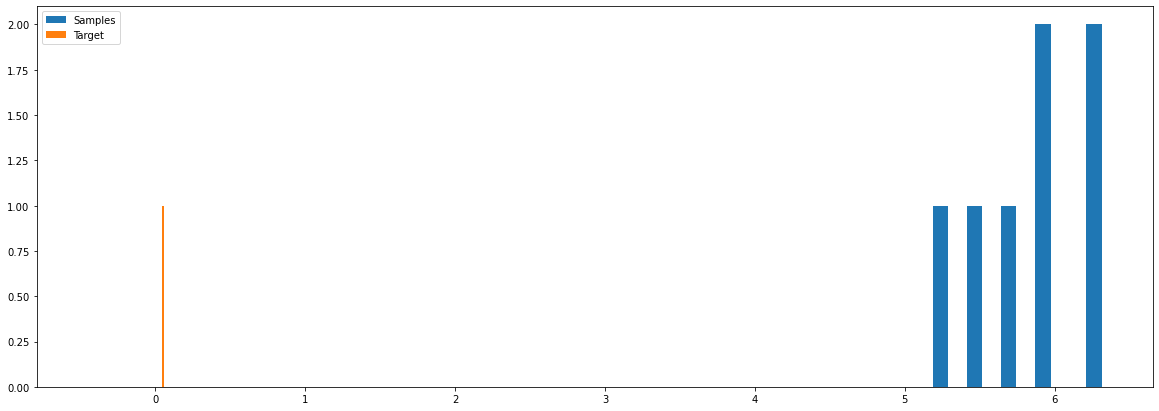

In [7]:
plot_DLS(loaded_dict, savefig = False)

## Nth Iteration 

In [38]:
Iterations = 25 #sample size for GA 
Moves_ahead = 3 #moves ahead that are calculated 
GA_iterations = 8 #times per move that the GA is used 
n_samples = 7 #sample size
seed = 2
###################### Setting 1 #########################################
#loaded_dict = nth_iteration(loaded_dict, seed = seed, Iterations = Iterations, Moves_ahead = Moves_ahead, GA_iterations = GA_iterations, n_samples = n_samples)
###################### Setting 2 #########################################
loaded_dict = nth_iteration(loaded_dict, seed = seed, Iterations = Iterations, Moves_ahead = Moves_ahead, GA_iterations = GA_iterations, n_samples = n_samples)


The best move has a fitness value of 6.952357539960514
The best move occurs in 1 turns.

The surrogate model has a score of: 0.8478971946427973

[[0.21132484 0.53778776 0.25088739]
 [0.43184187 0.3201848  0.24797332]
 [0.21607534 0.41923834 0.36468632]
 [0.23322331 0.54692432 0.21985237]
 [0.22561007 0.51985286 0.25453707]
 [0.21558647 0.42063821 0.36377532]
 [0.23990765 0.44818031 0.31191204]]


In [39]:
loaded_dict['next_gen_conc'][-1,:] = loaded_dict['best_conc_array'][:-1]

In [40]:
loaded_dict['best_conc_array'][:-1]

array([0.32385493, 0.24711731, 0.42902775])

In [22]:
current_gen_spectra, conc_array_actual, spectra_array_actual = perform_UV_vis(loaded_dict['next_gen_conc'], loaded_dict['conc_array_actual'], loaded_dict['spectra_array_actual'])
loaded_dict['conc_array_actual'] = conc_array_actual
loaded_dict['spectra_array_actual'] = spectra_array_actual
current_gen_spectra = current_gen_spectra.T
current_gen_spectra = mms().fit(current_gen_spectra).transform(current_gen_spectra).T
spectra_array_actual = spectra_array_actual.T
spectra_array_actual = mms().fit(spectra_array_actual).transform(spectra_array_actual).T
loaded_dict['current_gen_spectra'] = current_gen_spectra

In [41]:
current_gen_DLS, conc_array_actual, single_data_actual = perform_DLS(loaded_dict['next_gen_conc'], loaded_dict['single_data_actual'], loaded_dict['conc_array_actual'])
loaded_dict['single_data'] = current_gen_DLS
loaded_dict['conc_array_actual'] = conc_array_actual
loaded_dict['single_data_actual'] = single_data_actual

The max fitness is: 2.2216457977557273
The median fitness is: 1.528678108221435


NameError: name 'current_gen_spectra' is not defined

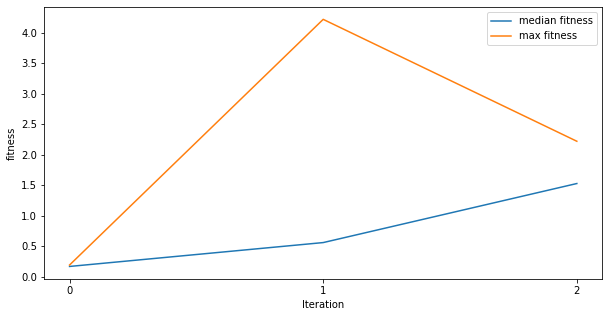

In [20]:
################## Setting 1  #################################
median_fitness_list, max_fitness_list, iteration = plot_fitness(loaded_dict, wavelength = wavelength, savefig = False)
loaded_dict['median_fitness_list'] = median_fitness_list
loaded_dict['max_fitness_list'] = max_fitness_list
loaded_dict['current_gen_spectra'] = current_gen_spectra


In [30]:
plot_spectra(loaded_dict, wavelength = wavelength, savefig = False)

KeyError: 'current_gen_spectra'

The max fitness is: 7.522750150316714
The median fitness is: 1.6895430166145207


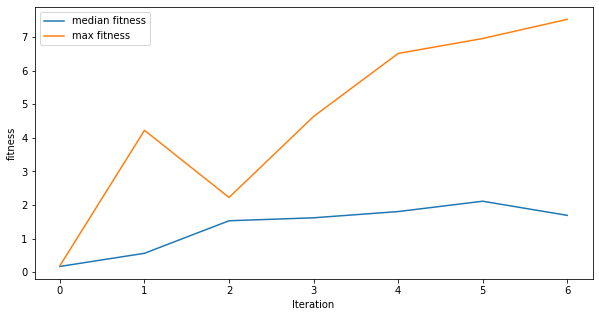

In [42]:
##################### Setting 2 #########################
next_gen_conc = loaded_dict['next_gen_conc']
single_data = loaded_dict['single_data']
median_fitness_list = loaded_dict['median_fitness_list']
max_fitness_list = loaded_dict['max_fitness_list']
iteration = loaded_dict['iteration']
median_fitness_list, max_fitness_list, iteration = plot_fitness(loaded_dict, savefig = False)
loaded_dict['median_fitness_list'] = median_fitness_list
loaded_dict['max_fitness_list'] = max_fitness_list

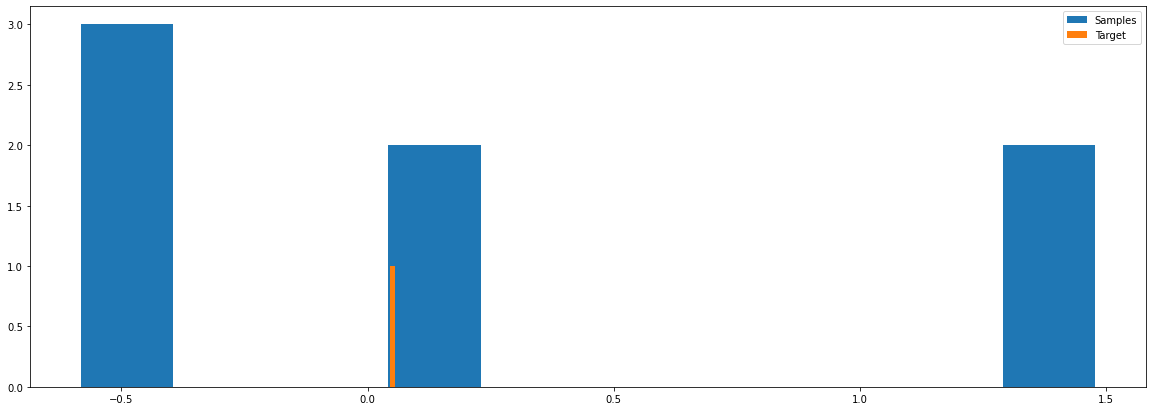

In [43]:
plot_DLS(loaded_dict, savefig = False)

In [45]:
loaded_dict['single_data_actual']

array([[ 5.17994624],
       [ 5.69060247],
       [ 6.21736324],
       [ 5.92628024],
       [ 6.32019829],
       [ 5.90048454],
       [ 5.44313412],
       [ 1.77388256],
       [ 1.04531085],
       [ 3.95669824],
       [-0.22695035],
       [ 3.21393035],
       [ 3.93229643],
       [ 1.41881351],
       [ 1.00209093],
       [ 1.94513345],
       [-0.64221834],
       [ 1.54227838],
       [ 0.44011676],
       [-0.64415995],
       [ 0.51729409],
       [-0.63868107],
       [ 1.16867323],
       [ 0.2165995 ],
       [-0.63908977],
       [-0.46608657],
       [ 0.20587674],
       [ 0.60842692],
       [-0.5447621 ],
       [ 1.42263388],
       [ 0.15375232],
       [-0.7055572 ],
       [-0.36274958],
       [ 0.14367215],
       [ 1.51300719],
       [-0.51728636],
       [ 1.41837391],
       [ 0.14381466],
       [-0.46387963],
       [-0.45400941],
       [ 0.1338361 ],
       [ 1.5009121 ],
       [-0.59275206],
       [ 1.37441679],
       [ 0.132796  ],
       [-0